![Finance Toolkit](https://github.com/JerBouma/FinanceToolkit/assets/46355364/198d47bd-e1b3-492d-acc4-5d9f02d1d009)

The Finance Toolkit is complimented very well with the [Finance Database 🌎](https://github.com/JerBouma/FinanceDatabase), a database that features 300.000+ symbols containing Equities, ETFs, Funds, Indices, Currencies, Cryptocurrencies and Money Markets. By utilising both, it is possible to do a fully-fledged competitive analysis with the tickers found from the FinanceDatabase inputted into the Finance Toolkit.

To install the **FinanceDatabase** it simply requires the following:

```
pip install financedatabase -U
```

From within Python use:

```python
import financedatabase as fd
```

For a detailed explanation of how to use the Finance Database, please see the GitHub page as found [here](https://github.com/JerBouma/FinanceDatabase).

In [1]:
from financetoolkit import Toolkit
import financedatabase as fd

API_KEY = "FINANCIAL_MODELING_PREP_API_KEY"

Lets start with searching for companies matching the industry `Road & Rail` in the `United States` that are defined as `Large Cap`.

In [2]:
# Initialize the Equities database
equities = fd.Equities()

# Obtain related companies
road_and_rail = equities.search(
    industry="Road & Rail",
    country="United States",
    market_cap="Large Cap",
    exclude_exchanges=True,
)

# Show the related DataFrame
road_and_rail

,name,summary,currency,sector,industry_group,industry,exchange,market,country,state,city,zipcode,website,market_cap,isin,cusip,figi,composite_figi,shareclass_figi
symbol,,,,,,,,,,,,,,,,,,,
CSX,CSX Corporation,"CSX Corporation, together with its subsidiarie...",USD,Industrials,Transportation,Road & Rail,NMS,NASDAQ Global Select,United States,FL,Jacksonville,32202,http://www.csx.com,Large Cap,US1264081035,126408103,BBG000BGK1N1,BBG000BGJRC8,BBG001S5Q7Q3
KSU,Kansas City Southern,"Kansas City Southern, a transportation holding...",USD,Industrials,Transportation,Road & Rail,NYQ,New York Stock Exchange,United States,MO,Kansas City,64105,http://www.kcsouthern.com,Large Cap,NaN,NaN,NaN,NaN,NaN
KSU-P,Kansas City Southern,"Kansas City Southern, a transportation holding...",USD,Industrials,Transportation,Road & Rail,NYQ,New York Stock Exchange,United States,MO,Kansas City,64105,http://www.kcsouthern.com,Large Cap,NaN,NaN,NaN,NaN,NaN
NSC,Norfolk Southern Corporation,"Norfolk Southern Corporation, together with it...",USD,Industrials,Transportation,Road & Rail,NYQ,New York Stock Exchange,United States,VA,Norfolk,23510-2191,http://www.norfolksouthern.com,Large Cap,US6558441084,655844108,BBG000BQ5GM4,BBG000BQ5DS5,BBG001S5TQJ6
UNP,Union Pacific Corporation,"Union Pacific Corporation, through its subsidi...",USD,Industrials,Transportation,Road & Rail,NYQ,New York Stock Exchange,United States,NE,Omaha,68179,http://www.up.com,Large Cap,US9078181081,907818108,BBG000BW3413,BBG000BW3299,BBG001S5X2M0
WAB,Westinghouse Air Brake Technologies Corporation,Westinghouse Air Brake Technologies Corporatio...,USD,Industrials,Transportation,Road & Rail,NYQ,New York Stock Exchange,United States,PA,Pittsburgh,15212,http://www.wabteccorp.com,Large Cap,US9297401088,929740108,BBG000BDDBD5,BBG000BDD940,BBG001S5XBT3


It appears that Kansas City Southern has been merged with Canadian Pacific Railway ([source](https://www.kcsouthern.com/media/news/news-releases/canadian-pacific-and-kansas-city-southern-combination-approved-by-u-s-surface-transportation-board)). Because of this, the ticker is taken out. The reason it still exists in the dataset of the FinanceDatabase is to control for survivorship bias.

In [3]:
road_and_rail = road_and_rail.drop(["KSU", "KSU-P"])

From here on, the tickers from the dataset are used to initialize the Finance Toolkit.

In [4]:
rail_companies = Toolkit(list(road_and_rail.index), api_key=API_KEY)

Let's start by showing the historical prices and plotting them accordingly.

Adj Close                                          Close  \
                  CSX         NSC         UNP         WAB        CSX   
Date                                                                   
2023-07-13  33.720001  233.520004  210.610001  112.320000  33.720001   
2023-07-14  33.630001  234.779999  210.990005  111.930000  33.630001   
2023-07-17  33.220001  233.179993  209.860001  112.660004  33.220001   
2023-07-18  33.750000  235.139999  212.619995  113.400002  33.750000   
2023-07-19  33.799999  237.410004  214.250000  112.570000  33.799999   

                                                     High              ...  \
                   NSC         UNP         WAB        CSX         NSC  ...   
Date                                                                   ...   
2023-07-13  233.520004  210.610001  112.320000  33.799999  233.919998  ...   
2023-07-14  234.779999  210.990005  111.930000  33.720001  234.860001  ...   
2023-07-17  233.179993  209.860001  112.660004  33.439999  234.399994  ...   
2023-07-18  235.139999  212.619995  113.400002  33.759998  235.529999  ...   
2023-07-19  237.410004  214.250000  112.570000  33.919998  237.809998  ...   

                   Low                   Open                          \
                   UNP         WAB        CSX         NSC         UNP   
Date                                                                    
2023-07-13  208.570007  111.519997  33.560001  231.559998  209.429993   
2023-07-14  209.869995  110.580002  33.599998  233.570007  210.369995   
2023-07-17  209.100006  110.809998  33.430000  234.399994  210.559998   
2023-07-18  209.100006  111.949997  33.189999  233.000000  209.460007   
2023-07-19  212.500000  112.110001  33.680000  235.000000  212.860001   

                          Volume                           
                   WAB       CSX     NSC      UNP     WAB  
Date                                                       
2023-07-13  112.120003   9960800  777800  2214300  991700  
2023-07-14  112.389999   7891500  948200  1603000  684600  
2023-07-17  112.010002  14878400  882200  1471700  606300  
2023-07-18  112.290001  12823000  803000  1893600  671100  
2023-07-19  112.580002  10624400  809200  2036600  966200  

[5 rows x 24 columns]

<Axes: xlabel='Date'>

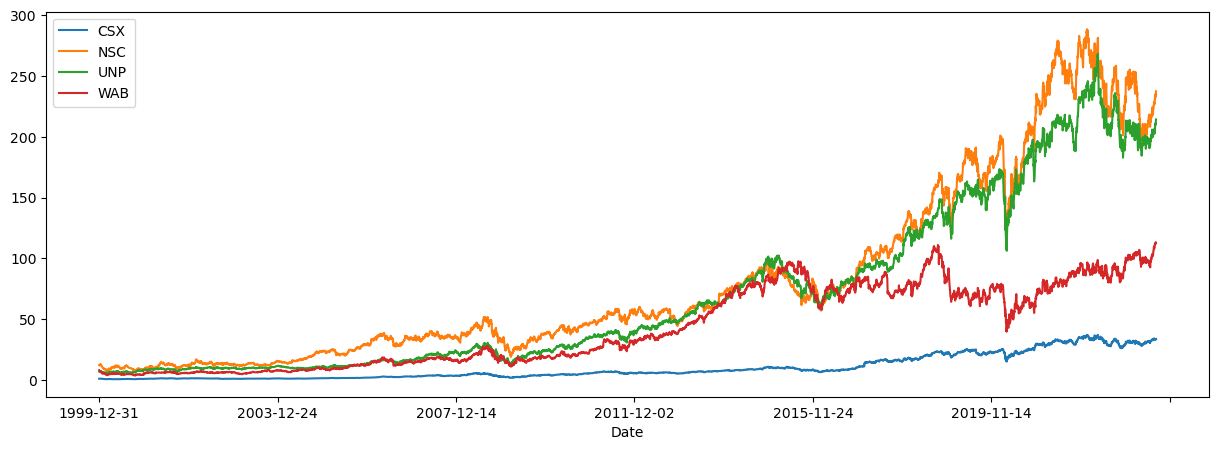

In [5]:
# Collect Historical Data for each ticker
historical_data = rail_companies.get_historical_data(start="2000-01-01")

# Show a portion of the dataset
display(historical_data.tail(5))

# Plot the Adjusted Close Prices
historical_data["Adj Close"].plot(figsize=(15, 5))

Let's have a look at the Balance Sheet Statement as well.

In [6]:
# Collect and show the Balance Sheet Statements
rail_companies.get_balance_sheet_statement()

date                                         1985          1986         1987  \
CSX Cash and Cash Equivalents        1.870000e+08  3.150000e+08  921000000.0   
    Short Term Investments           0.000000e+00  0.000000e+00          0.0   
    Cash and Short Term Investments  1.870000e+08  3.150000e+08  921000000.0   
    Accounts Receivable              1.299000e+09  1.182000e+09  876000000.0   
    Inventory                        4.280000e+08  3.560000e+08  363000000.0   
...                                           ...           ...          ...   
WAB Minority Interest                         NaN           NaN          NaN   
    Total Liabilities and Equity              NaN           NaN          NaN   
    Total Investments                         NaN           NaN          NaN   
    Total Debt                                NaN           NaN          NaN   
    Net Debt                                  NaN           NaN          NaN   

date                                        1988         1989         1990  \
CSX Cash and Cash Equivalents        625000000.0  534000000.0  609000000.0   
    Short Term Investments                   0.0          0.0          0.0   
    Cash and Short Term Investments  625000000.0  534000000.0  609000000.0   
    Accounts Receivable              896000000.0  645000000.0  728000000.0   
    Inventory                        241000000.0  237000000.0  257000000.0   
...                                          ...          ...          ...   
WAB Minority Interest                        NaN          NaN          NaN   
    Total Liabilities and Equity             NaN          NaN          NaN   
    Total Investments                        NaN          NaN          NaN   
    Total Debt                               NaN          NaN          NaN   
    Net Debt                                 NaN          NaN          NaN   

date                                        1991         1992         1993  \
CSX Cash and Cash Equivalents        465000000.0  530000000.0  298000000.0   
    Short Term Investments                   0.0          0.0          0.0   
    Cash and Short Term Investments  465000000.0  530000000.0  298000000.0   
    Accounts Receivable              728000000.0  605000000.0  668000000.0   
    Inventory                        206000000.0  189000000.0  199000000.0   
...                                          ...          ...          ...   
WAB Minority Interest                        NaN          NaN          NaN   
    Total Liabilities and Equity             NaN          NaN          NaN   
    Total Investments                        NaN          NaN          NaN   
    Total Debt                               NaN          NaN          NaN   
    Net Debt                                 NaN          NaN          NaN   

date                                        1994  ...          2013  \
CSX Cash and Cash Equivalents        535000000.0  ...  5.920000e+08   
    Short Term Investments                   0.0  ...  4.870000e+08   
    Cash and Short Term Investments  535000000.0  ...  1.079000e+09   
    Accounts Receivable              706000000.0  ...  1.052000e+09   
    Inventory                        211000000.0  ...  2.520000e+08   
...                                          ...  ...           ...   
WAB Minority Interest                        NaN  ...  1.908000e+06   
    Total Liabilities and Equity             NaN  ...  2.820089e+09   
    Total Investments                        NaN  ...  0.000000e+00   
    Total Debt                               NaN  ...  4.507090e+08   
    Net Debt                                 NaN  ...  1.649490e+08   

date                                         2014          2015          2016  \
CSX Cash and Cash Equivalents        6.690000e+08  6.280000e+08  6.030000e+08   
    Short Term Investments           2.920000e+08  8.100000e+08  4.170000e+08   
    Cash and Short Term Investments  9.610000e+08  1.438000e+09  1.02

A very important financial ratio is the "Operating Ratio" for railroad companies. An operating ratio of 80 or lower has generally been seen as good but having a target as low as the mid-70s is even better. From the table below, it is clear that all companies except for WAB (Westinghouse Air Brake Technologies Corporation) are performing very well. This, however, makes sense since WAB is specialized on providing parts instead of actual railroad services.

In [7]:
# Collect and show the Balance Sheet Statements
rail_companies.ratios.get_operating_ratio()

The following data was not provided within the Toolkit class and thus was retrieved from FinancialModelingPrep: Income Statement, Cash Flow Statement.


date,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
CSX,0.879645,0.836564,0.888723,0.880269,0.887799,0.900670,0.988536,0.969544,0.897875,1.578684,...,0.711209,0.714816,0.696554,0.693830,0.669267,0.610367,0.599062,0.589625,0.595831,0.619471
NSC,0.812031,0.827789,0.974470,0.788148,0.818078,0.824973,0.974839,0.807559,0.807090,0.897082,...,0.703779,0.682037,0.714014,0.677488,0.647806,0.633793,0.646866,0.653999,0.600880,0.622676
UNP,0.845345,0.664131,0.612485,0.754120,0.775416,0.770103,0.766112,0.776392,0.816162,0.789433,...,0.660975,0.635109,0.630862,0.635324,0.620480,0.626971,0.605952,0.598935,0.571730,0.601327
WAB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.781633,0.743309,...,0.829601,0.826863,0.816334,0.843626,0.891355,0.891502,0.919134,0.901470,0.888008,0.879096


Other than this ratio, important other metrics are revenue growth, strong profit margins and efficient capital management. These can be explored further by looking into the income statement, the profit margin ratio and the current ratio.

In [8]:
# Obtain the income statement and select the revenues
revenues = rail_companies.get_income_statement().loc[:, "Revenue", :]

# Show revenue absolute numbers for each company
display(revenues)

# Show the revenue growth for each company
display(revenues.pct_change(axis=1))

date,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
CSX,7.320000e+09,6.345000e+09,8.043000e+09,7.592000e+09,7.745000e+09,8.205000e+09,8.636000e+09,8.734000e+09,8.940000e+09,9.608000e+09,...,1.202600e+10,1.266900e+10,1.181100e+10,1.106900e+10,1.140800e+10,1.225000e+10,1.193700e+10,1.058300e+10,1.252200e+10,1.485300e+10
NSC,3.825100e+09,4.076400e+09,4.112800e+09,4.461600e+09,4.536000e+09,4.617000e+09,4.451300e+09,4.606600e+09,4.460100e+09,4.581300e+09,...,1.124500e+10,1.162400e+10,1.051100e+10,9.888000e+09,1.055100e+10,1.145800e+10,1.129600e+10,9.789000e+09,1.114200e+10,1.274500e+10
UNP,7.798000e+09,6.574000e+09,5.943000e+09,6.068000e+09,6.492000e+09,6.964000e+09,7.029000e+09,7.294000e+09,7.561000e+09,7.798000e+09,...,2.196300e+10,2.398800e+10,2.181300e+10,1.994100e+10,2.124000e+10,2.283200e+10,2.170800e+10,1.953300e+10,2.180400e+10,2.487500e+10
WAB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.853000e+08,3.475000e+08,...,2.566392e+09,3.044454e+09,3.307998e+09,2.931188e+09,3.881756e+09,4.363547e+09,8.200000e+09,7.556100e+09,7.822000e+09,8.362000e+09


date,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
CSX,NaN,-0.133197,0.267612,-0.056074,0.020153,0.059393,0.052529,0.011348,0.023586,0.074720,...,0.022967,0.053467,-0.067724,-0.062823,0.030626,0.073808,-0.025551,-0.113429,0.183218,0.186152
NSC,NaN,0.065698,0.008929,0.084808,0.016676,0.017857,-0.035889,0.034889,-0.031802,0.027174,...,0.018569,0.033704,-0.095750,-0.059271,0.067051,0.085963,-0.014139,-0.133410,0.138216,0.143870
UNP,NaN,-0.156963,-0.095984,0.021033,0.069875,0.072705,0.009334,0.037701,0.036605,0.031345,...,0.049556,0.092201,-0.090670,-0.085820,0.065142,0.074953,-0.049229,-0.100193,0.116265,0.140846
WAB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.218016,...,0.073300,0.186278,0.086565,-0.113909,0.324294,0.124117,0.879205,-0.078524,0.035190,0.069036


Profit Margins can be looked at from a variety of perspectives. The Finance Toolkit features Gross, Operating, Net Profit and EBT Profit Margins. With the `collect_profitability_ratios` functions within the `ratios` module these can be collected for each company accompanied with many other useful ratios. To provide an appropriate overview, the profitability ratios are only shown for `CSX`.

In [9]:
# Collect the profitability ratios and select the ratios for CSX
rail_companies.ratios.collect_profitability_ratios().loc["CSX"]

date,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Gross Margin,0.176230,0.217652,0.178913,0.181243,0.169916,0.156977,0.069477,0.090795,0.166107,0.409971,...,0.288791,0.285184,0.303446,0.306170,0.330733,0.389633,0.408310,0.412170,0.410478,0.389484
Operating Margin,0.120355,0.163436,0.111277,0.119731,0.112201,0.099330,0.011464,0.030456,0.102125,0.128226,...,0.288791,0.285184,0.303446,0.306170,0.321441,0.397469,0.415934,0.412170,0.446734,0.405507
Net Profit Margin,-0.016120,0.065879,0.053711,-0.004347,0.055391,0.044363,-0.008800,0.002290,0.040157,0.067860,...,0.154998,0.152104,0.166624,0.154847,0.479576,0.270122,0.279048,0.261268,0.301949,0.280482
Interest Coverage Ratio,inf,inf,inf,inf,inf,inf,-inf,-inf,inf,inf,...,8.144128,8.741284,8.808824,8.100173,9.124542,9.702660,8.686567,7.644562,9.195291,9.997305
Income Before Tax Profit Margin,-0.035929,0.114894,0.084794,-0.007903,0.089348,0.065448,-0.013085,-0.000801,0.070805,0.104704,...,0.242974,0.240272,0.265685,0.247629,0.275421,0.351347,0.361565,0.342719,0.395384,0.364505
Effective Tax Rate,0.551331,0.426612,0.366569,0.366667,0.382948,0.320298,0.327434,3.857143,0.432859,0.351889,...,0.362081,0.366951,0.372849,0.374681,-0.741248,0.231180,0.228221,0.237662,0.236316,0.230513
Return on Assets (ROA),-0.010266,0.033015,0.032651,-0.002533,0.034884,0.028429,-0.005938,0.001533,0.026751,0.047508,...,0.058650,0.058300,0.056166,0.048399,0.153082,0.090092,0.087069,0.069485,0.093287,0.099399
Return on Equity (ROE),NaN,0.088297,0.088788,-0.008148,0.126867,0.103087,-0.022609,0.006497,0.116653,0.188685,...,0.191464,0.178137,0.172601,0.146929,0.414721,0.242702,0.272742,0.221439,0.284179,0.318928
Return on Invested Capital (ROIC),NaN,NaN,NaN,NaN,0.052769,0.050170,0.007164,-0.078600,0.044786,0.082721,...,0.078443,0.077442,0.074456,0.065167,0.405792,0.114254,0.112440,0.091077,0.118135,0.125890
Return on Capital Employed (ROCE),-0.027562,0.067413,0.060178,-0.005519,0.069630,0.051043,-0.010949,-0.000650,0.056797,0.089669,...,0.118673,0.115976,0.111282,0.099479,0.108967,0.141983,0.139949,0.115979,0.148128,0.156081


Capital Management can be viewed from multiple angles including liquidity, accounts receivable, inventory and accounts payable management. These lead to the Operating and Cash Conversion Cycles. All of these ratios can be found within the `collect_efficiency_ratios` and `collect_liquidity_ratios` functions within the `ratios` module.

In [10]:
# Collect the liquidity ratios for all companies
rail_companies.ratios.collect_liquidity_ratios()

date                                            1985          1986  \
CSX Current Ratio                       1.050205e+00  1.137520e+00   
    Quick Ratio                         7.612705e-01  8.105035e-01   
    Cash Ratio                          9.579918e-02  1.705468e-01   
    Working Capital                     9.800000e+07  2.540000e+08   
    Operating Cash Flow Ratio                    NaN           NaN   
    Operating Cash Flow to Sales Ratio           NaN           NaN   
    Short Term Coverage Ratio                    NaN           NaN   
NSC Current Ratio                                NaN           NaN   
    Quick Ratio                                  NaN           NaN   
    Cash Ratio                                   NaN           NaN   
    Working Capital                              NaN           NaN   
    Operating Cash Flow Ratio                    NaN           NaN   
    Operating Cash Flow to Sales Ratio           NaN           NaN   
    Short Term Coverage Ratio                    NaN           NaN   
UNP Current Ratio                       1.053667e+00  8.665550e-01   
    Quick Ratio                         7.221228e-01  5.209380e-01   
    Cash Ratio                          2.701252e-01  1.675042e-01   
    Working Capital                     9.000000e+07 -2.390000e+08   
    Operating Cash Flow Ratio                    NaN           NaN   
    Operating Cash Flow to Sales Ratio           NaN           NaN   
    Short Term Coverage Ratio                    NaN           NaN   
WAB Current Ratio                                NaN           NaN   
    Quick Ratio                                  NaN           NaN   
    Cash Ratio                                   NaN           NaN   
    Working Capital                              NaN           NaN   
    Operating Cash Flow Ratio                    NaN           NaN   
    Operating Cash Flow to Sales Ratio           NaN           NaN   
    Short Term Coverage Ratio                    NaN           NaN   

date                                            1987          1988  \
CSX Current Ratio                       1.259220e+00  7.954917e-01   
    Quick Ratio                         9.467861e-01  4.968964e-01   
    Cash Ratio                          4.852476e-01  2.041816e-01   
    Working Capital                     4.920000e+08 -6.260000e+08   
    Operating Cash Flow Ratio                    NaN           NaN   
    Operating Cash Flow to Sales Ratio           NaN           NaN   
    Short Term Coverage Ratio                    NaN           NaN   
NSC Current Ratio                                NaN           NaN   
    Quick Ratio                                  NaN           NaN   
    Cash Ratio                                   NaN           NaN   
    Working Capital                              NaN           NaN   
    Operating Cash Flow Ratio                    NaN           NaN   
    Operating Cash Flow to Sales Ratio           NaN           NaN   
    Short Term Coverage Ratio                    NaN           NaN   
UNP Current Ratio                       8.920128e-01  8.962366e-01   
    Quick Ratio                         5.629393e-01  6.188172e-01   
    Cash Ratio                          1.054313e-01  2.360215e-01   
    Working Capital                    -1.690000e+08 -1.930000e+08   
    Operating Cash Flow Ratio                    NaN           NaN   
    Operating Cash Flow to Sales Ratio           NaN           NaN   
    Short Term Coverage Ratio                    NaN           NaN   
WAB Current Ratio                                NaN           NaN   
    Quick Ratio                                  NaN           NaN   
    Cash Ratio                                   NaN           NaN   
    Working Capital                              NaN           NaN   
    Operating Cash Flow Ratio                    NaN           NaN   
    Operating Cash Flow to Sales Ratio           NaN           NaN   
    Short

In [11]:
# Collect the efficiency ratios for all companies
rail_companies.ratios.collect_efficiency_ratios()

date                                                1985        1986  \
CSX Days of Inventory Outstanding (DIO)              NaN   28.823529   
    Days of Sales Outstanding (DSO)                  NaN   71.360520   
    Operating Cycle (CC)                             NaN  100.184050   
    Days of Accounts Payable Outstanding (DPO)       NaN    0.000000   
    Cash Conversion Cycle (CCC)                      NaN  100.184050   
    Receivables Turnover                             NaN    0.195508   
    Inventory Turnover Ratio                         NaN   12.663265   
    Accounts Payable Turnover Ratio                  NaN         inf   
    SGA-to-Revenue Ratio                        0.000000    0.000000   
    Fixed Asset Turnover                             NaN    0.634373   
    Asset Turnover Ratio                             NaN    0.525357   
    Operating Ratio                             0.879645    0.836564   
NSC Days of Inventory Outstanding (DIO)              NaN         NaN   
    Days of Sales Outstanding (DSO)                  NaN         NaN   
    Operating Cycle (CC)                             NaN         NaN   
    Days of Accounts Payable Outstanding (DPO)       NaN         NaN   
    Cash Conversion Cycle (CCC)                      NaN         NaN   
    Receivables Turnover                             NaN         NaN   
    Inventory Turnover Ratio                         NaN         NaN   
    Accounts Payable Turnover Ratio                  NaN         NaN   
    SGA-to-Revenue Ratio                        0.090873    0.096016   
    Fixed Asset Turnover                             NaN         NaN   
    Asset Turnover Ratio                             NaN         NaN   
    Operating Ratio                             0.812031    0.827789   
UNP Days of Inventory Outstanding (DIO)              NaN   63.201675   
    Days of Sales Outstanding (DSO)                  NaN   38.615379   
    Operating Cycle (CC)                             NaN  101.817054   
    Days of Accounts Payable Outstanding (DPO)       NaN    0.000000   
    Cash Conversion Cycle (CCC)                      NaN  101.817054   
    Receivables Turnover                             NaN    0.105796   
    Inventory Turnover Ratio                         NaN    5.775163   
    Accounts Payable Turnover Ratio                  NaN         inf   
    SGA-to-Revenue Ratio                        0.288664    0.271068   
    Fixed Asset Turnover                             NaN    0.720280   
    Asset Turnover Ratio                             NaN    0.609466   
    Operating Ratio                             0.845345    0.664131   
WAB Days of Inventory Outstanding (DIO)              NaN         NaN   
    Days of Sales Outstanding (DSO)                  NaN         NaN   
    Operating Cycle (CC)                             NaN         NaN   
    Days of Accounts Payable Outstanding (DPO)       NaN         NaN   
    Cash Conversion Cycle (CCC)                      NaN         NaN   
    Receivables Turnover                             NaN         NaN   
    Inventory Turnover Ratio                         NaN         NaN   
    Accounts Payable Turnover Ratio                  NaN         NaN   
    SGA-to-Revenue Ratio                             NaN         NaN   
    Fixed Asset Turnover                             NaN         NaN   
    Asset Turnover Ratio                             NaN         NaN   
    Operating Ratio                                  NaN         NaN   

date                                                  1987       1988  \
CSX Days of Inventory Outstanding (DIO)          19.869397  17.733269   
    Days of Sales Outstanding (DSO)              46.697128  42.596154   
    Operating Cycle (CC)                         66.566525  60.329423   
    Days of Accounts Payable Outstanding (DPO)    0.000000   0.000000   
    Cash Conversion Cycle (CCC)                  66.566525  60.329423   
    Receivables Turnover         